In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
# display the first 5 rows of dataset
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# print the description of the dataset
print(df.describe())
print(df.isnull().sum())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


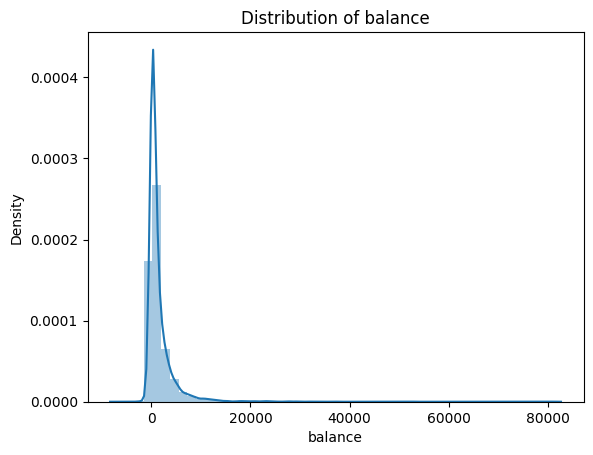

skewness: 8.224619
Kurtosis: 126.861303


In [4]:
# analysing balance features
sns.distplot(df['balance'])
plt.title('Distribution of balance')
plt.show()
# print skewness and kurtosis value of the data
#kurtosis is used to determined whether the data is heavily tailed or not. If kurtosis value is high then it is
#said to have highly tailed i.e. that is the data contain outliers.
print("skewness: %f" % df['balance'].skew())
print("Kurtosis: %f" % df['balance'].kurt())

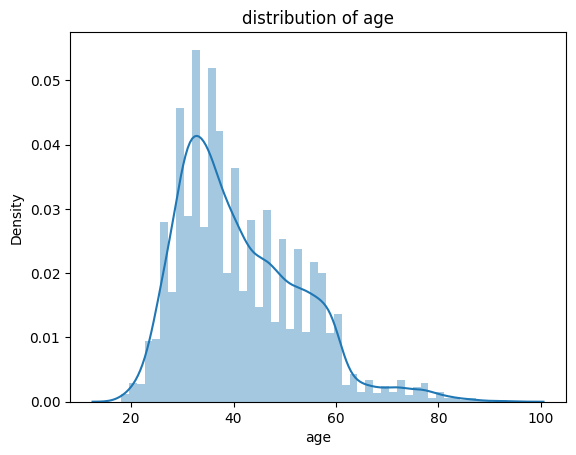

skewness: 0.862780
Kurtosis: 0.621540


In [5]:
# distribution of age
sns.distplot(df['age'])
plt.title("distribution of age")
plt.show()
# print skewness and kurtosis value of the data
print("skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())

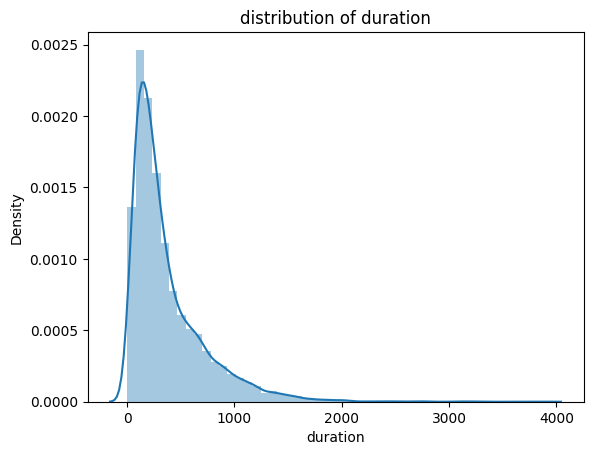

In [6]:
# distribution of duration
sns.distplot(df['duration'])
plt.title("distribution of duration")
plt.show()

Text(0.5, 1.0, 'Count of different marital status')

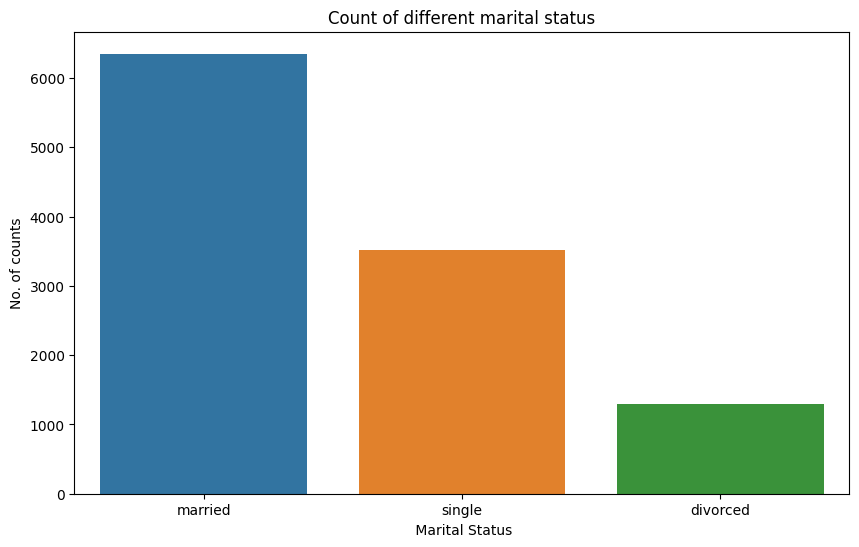

In [7]:
# count plot for marital data
plt.figure(figsize = (10,6))
sns.countplot(x = df['marital'])
plt.xlabel(" Marital Status")
plt.ylabel("No. of counts")
plt.title("Count of different marital status")

Text(0.5, 1.0, 'Count of different job category')

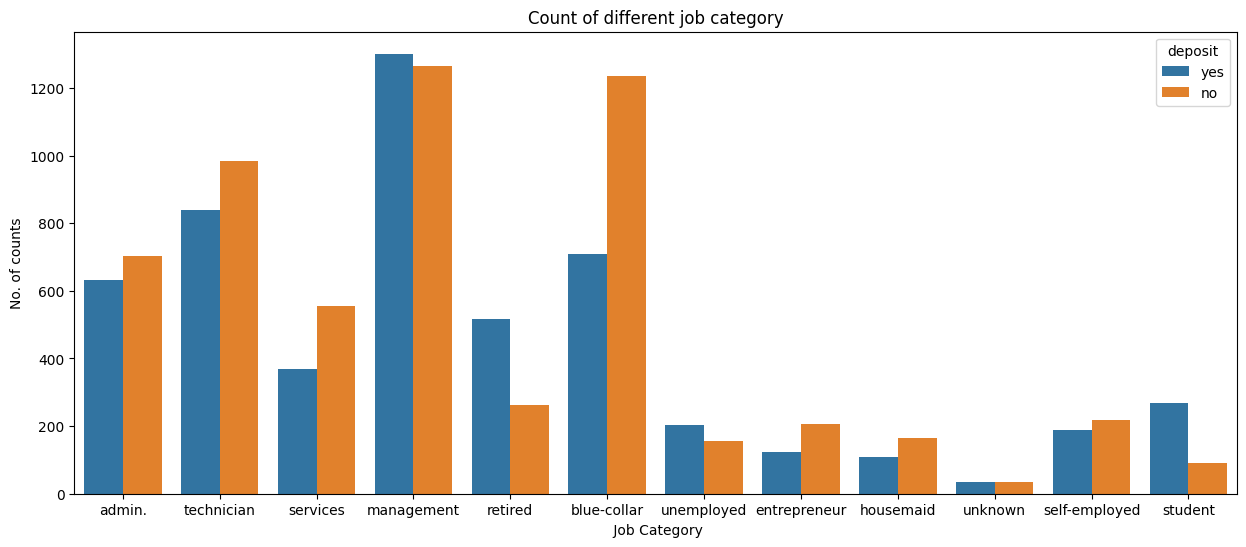

In [8]:
# plot for job category
plt.figure(figsize = (15,6))
sns.countplot(x = df['job'], hue = df['deposit'])
plt.xlabel(" Job Category")
plt.ylabel("No. of counts")
plt.title("Count of different job category")

Text(0.5, 1.0, 'Count of Campaign made')

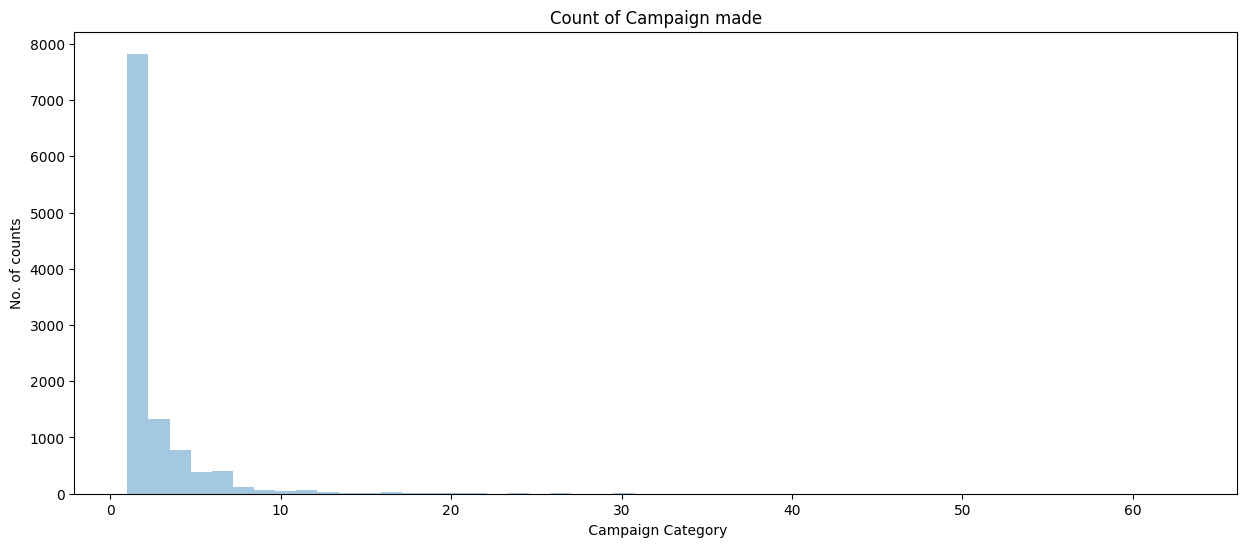

In [9]:
# plot for campaign category
plt.figure(figsize = (15,6))
sns.distplot(df['campaign'], kde = False)
plt.xlabel(" Campaign Category")
plt.ylabel("No. of counts")
plt.title("Count of Campaign made")

Text(0.5, 1.0, 'Count of target variable that is subscription')

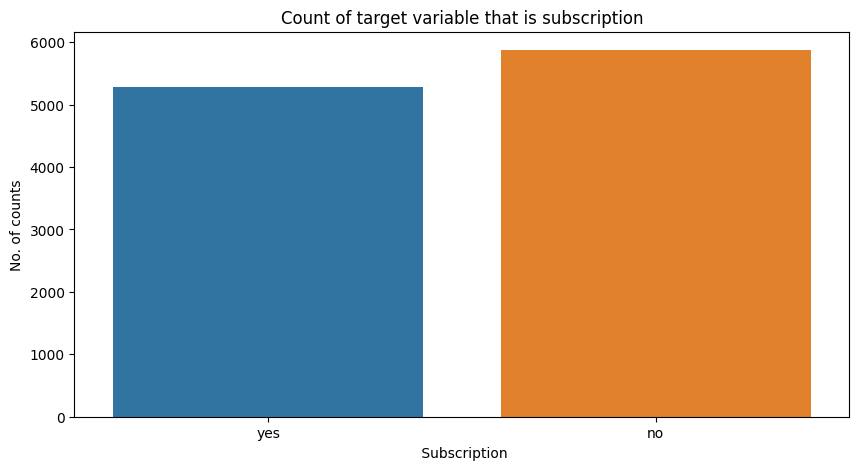

In [10]:
# plot for target variable
plt.figure(figsize = (10,5))
sns.countplot(x = df['deposit'])
plt.xlabel(" Subscription")
plt.ylabel("No. of counts")
plt.title("Count of target variable that is subscription")

Text(0.5, 0, 'Age')

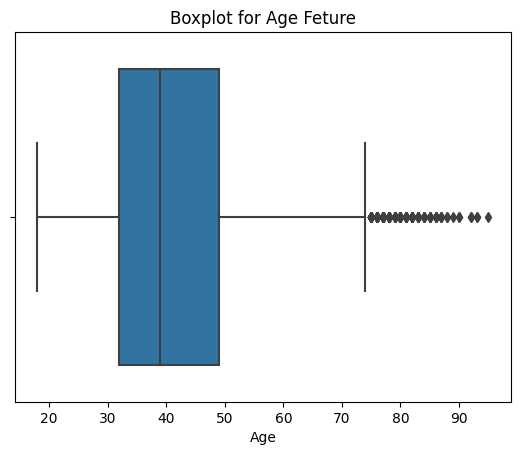

In [11]:
# boxplot for age
sns.boxplot(x = df['age'])
plt.title("Boxplot for Age Feture")
plt.xlabel("Age")


Text(0.5, 0, 'Duration')

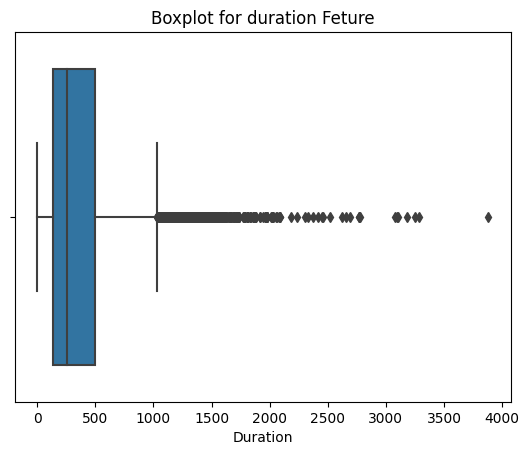

In [12]:
# box plot for duration
sns.boxplot(x = df['duration'] )
plt.title("Boxplot for duration Feture")
plt.xlabel("Duration")


Text(0.5, 0, 'Campaign')

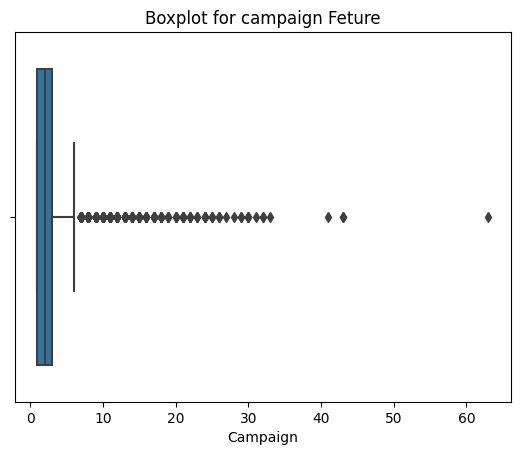

In [13]:
# box pot for campaign
sns.boxplot(x = df['campaign'] )
plt.title("Boxplot for campaign Feture")
plt.xlabel("Campaign")

In [14]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
print(Q1)
print(Q3)

122.0
1708.0


In [15]:
# difference between third quantile and first
IQR = Q3-Q1
print(IQR)

1586.0


In [16]:
# calculate upper limit and lower limit
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print(lower_lim)
print(upper_lim)

-2257.0
4087.0


In [17]:
# removing outliers from age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print(Q1)
print(Q3)

32.0
49.0


In [18]:
# difference between third quantile and first
IQR = Q3-Q1
print(IQR)

17.0


In [19]:
# calculate upper limit and lower limit
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print(lower_lim)
print(upper_lim)

6.5
74.5


In [20]:
# remove outliers from duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
print(Q1)
print(Q3)

138.0
496.0


In [21]:
# difference between third quantile and first
IQR = Q3-Q1
print(IQR)

358.0


In [22]:
# calculate upper limit and lower limit
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print(lower_lim)
print(upper_lim)

-399.0
1033.0


In [23]:
# Remove outoers from campaign
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
print("Q1 value is :", Q1)
print("Q3 value is :", Q3)

# difference between third quantile and first
IQR = Q3-Q1
print("IQR VALUE IS :", IQR)
# calculate upper limit and lower limit
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print("UPPER LIMMIT ", lower_lim)
print("LOWER LIMIT ", upper_lim)

Q1 value is : 1.0
Q3 value is : 3.0
IQR VALUE IS : 2.0
UPPER LIMMIT  -2.0
LOWER LIMIT  6.0


In [24]:
#replace with specific values to remove the outlers
df.loc[df['balance']>4087.0, "balance"]= 4087
df.loc[df['age']>74, "age"]= 74
df.loc[df['duration']>1033, "duration"]= 1033
df[(df.campaign>lower_lim)|(df.campaign>upper_lim)]
df = df[(df.campaign>lower_lim)&(df.campaign<upper_lim)]

Text(0.5, 0, 'DURATION')

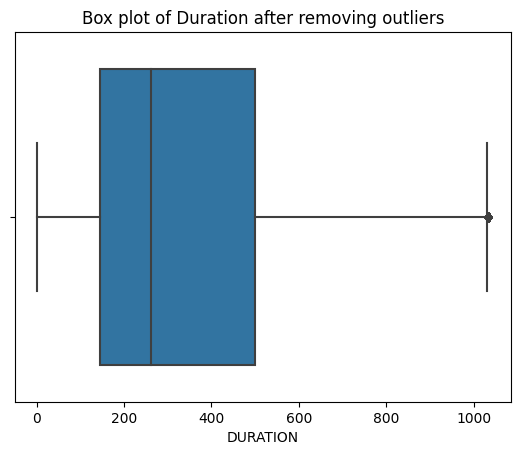

In [25]:
# box plot after removong outliers
sns.boxplot(x = df['duration'])
plt.title("Box plot of Duration after removing outliers")
plt.xlabel('DURATION')

Text(0.5, 0, 'BALANCE')

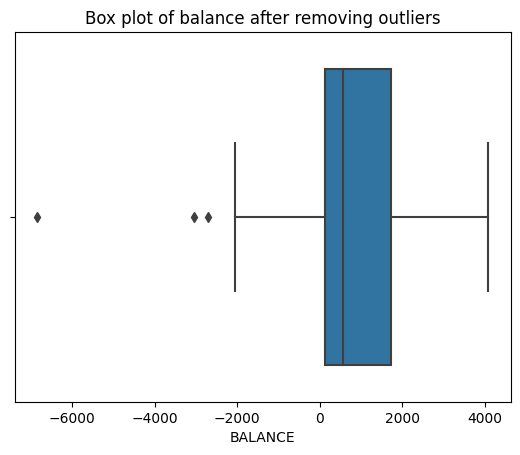

In [26]:
# box plot after removong outliers
sns.boxplot(x = df['balance'])
plt.title("Box plot of balance after removing outliers")
plt.xlabel('BALANCE')

Text(0.5, 0, 'AGE')

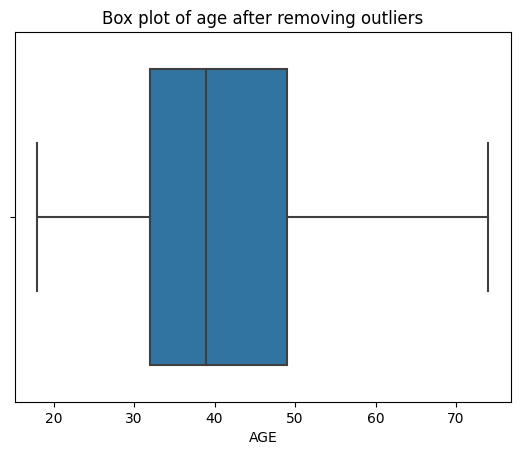

In [27]:
# box plot after removong outliers
sns.boxplot(x = df['age'])
plt.title("Box plot of age after removing outliers")
plt.xlabel('AGE')

Text(0.5, 0, 'CAMPAIGN')

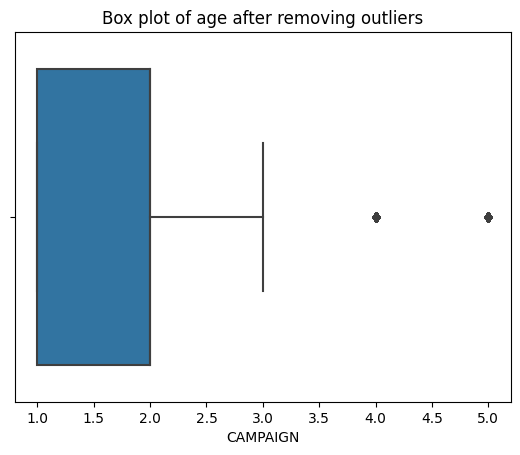

In [28]:
# box plot after removong outliers
sns.boxplot(x = df['campaign'])
plt.title("Box plot of age after removing outliers")
plt.xlabel('CAMPAIGN')

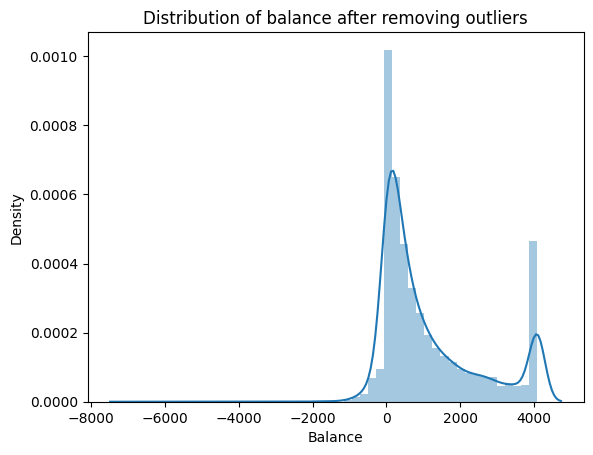

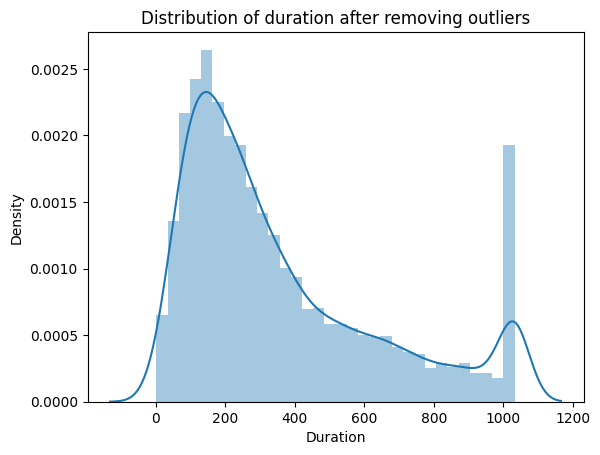

In [29]:
# analysing balance features
sns.distplot(df['balance'])
plt.title('Distribution of balance after removing outliers')
plt.xlabel("Balance")
plt.show()
# analysing duration features
sns.distplot(df['duration'])
plt.title('Distribution of duration after removing outliers')
plt.xlabel("Duration")
plt.show()

In [30]:
# print count of each value in particular feature columns
print(df['poutcome'].value_counts())
print("***********\n")
print(df['contact'].value_counts())
print("***********\n")
print(df['education'].value_counts())
print("***********\n")
print(df['job'].value_counts())

unknown    7538
failure    1202
success    1050
other       506
Name: poutcome, dtype: int64
***********

cellular     7490
unknown      2130
telephone     676
Name: contact, dtype: int64
***********

secondary    5061
tertiary     3407
primary      1373
unknown       455
Name: education, dtype: int64
***********

management       2344
blue-collar      1796
technician       1674
admin.           1235
services          841
retired           743
self-employed     373
student           343
unemployed        340
entrepreneur      300
housemaid         246
unknown            61
Name: job, dtype: int64


In [31]:
# Here I have considered all unknown values as a Null values.
# Replacing all unknown values with the values which occure most number of times.
# since the size of dataset is small and the count of unknown values are huge in each feature mentioned above.
# So we can not drop these unknown values because it will affect the size of data which can cause problem.
df['poutcome'] = df['poutcome'].replace(['unknown'], 'failure')
df['contact'] = df['contact'].replace(['unknown'], 'cellular')
df['education'] = df['education'].replace(['unknown'], 'secondary')
df['job'] = df['job'].replace(['unknown'], 'management')
# print the count of values after filling the unknown values.
print(df['poutcome'].value_counts())
print("***********\n")
print(df['contact'].value_counts())
print("***********\n")
print(df['education'].value_counts())
print("***********\n")
print(df['job'].value_counts())

failure    8740
success    1050
other       506
Name: poutcome, dtype: int64
***********

cellular     9620
telephone     676
Name: contact, dtype: int64
***********

secondary    5516
tertiary     3407
primary      1373
Name: education, dtype: int64
***********

management       2405
blue-collar      1796
technician       1674
admin.           1235
services          841
retired           743
self-employed     373
student           343
unemployed        340
entrepreneur      300
housemaid         246
Name: job, dtype: int64


<Axes: >

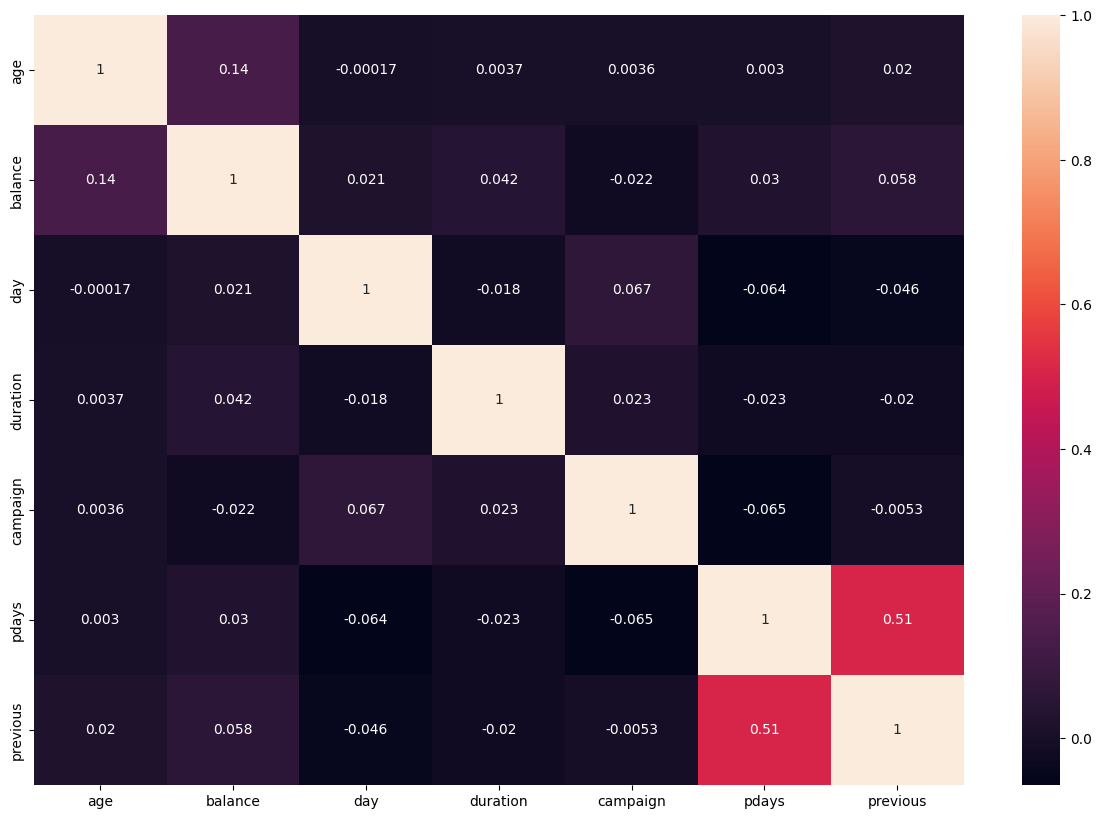

In [32]:
# heatmap plot help to find which two variables are correlated.
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [33]:
# encoding categorical feature.
df['default'].replace({'yes':1,'no':0},inplace=True)
df['housing'].replace({'yes':1,'no':0},inplace=True)
df['loan'].replace({'yes':1,'no':0},inplace=True)
df['deposit'].replace({'yes':1,'no':0}, inplace=True)
df['contact'].replace({'cellular':1,'telephone':0},inplace=True)
df['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun' : 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace = True)
# one hot encoding for other categorical features.
data1 = pd.get_dummies(data = df, columns = ['poutcome', 'education', 'marital', 'job'])
data1.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,0,2343,1,0,1,5,5,1033,1,...,0,0,0,0,0,0,0,0,0,0
1,56,0,45,0,0,1,5,5,1033,1,...,0,0,0,0,0,0,0,0,0,0
2,41,0,1270,1,0,1,5,5,1033,1,...,0,0,0,0,0,0,0,0,1,0
3,55,0,2476,1,0,1,5,5,579,1,...,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,1,5,5,673,2,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# perform standard scaler to scale down the vlaues.
from sklearn.preprocessing import StandardScaler
scaled_col = ['age', 'balance', 'duration', 'pdays']
scaler =StandardScaler()
data1[scaled_col] = scaler.fit_transform(data1[scaled_col])

In [35]:
from sklearn.model_selection import train_test_split
x = data1.drop(['deposit'], axis = 1)
y = data1['deposit']  # target feature
# split the data into train and test (75 : 25)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
# print shape of train and test data
print("shape of X_train :", x_train.shape)
print("shape of x_test :", x_test.shape)

shape of X_train : (7722, 32)
shape of x_test : (2574, 32)


In [36]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res, y_res = smk.fit_resample(x_train, y_train)
print(X_res.shape, y_res.shape)
# Count the number of classes
from collections import Counter
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_res)))

(7258, 32) (7258,)
The number of classes before fit Counter({0: 5260, 1: 5036})
The number of classes after fit Counter({0: 3629, 1: 3629})


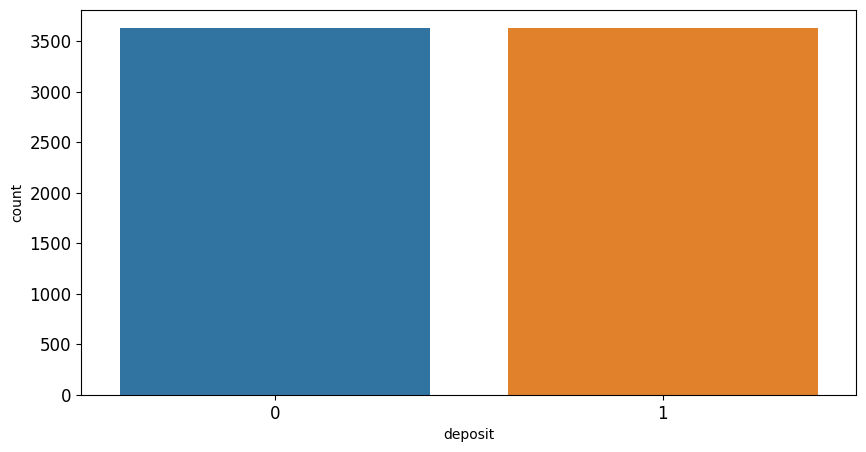

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(x = y_res, data=data1)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.show()

**Linear Regression**

In [38]:
# Linear Regression
# training model with Logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_res, y_res)
Lg_pred = lg.predict(x_test)
# Get the accuracy and classification report
from sklearn import metrics
print("Accuracy is : ", metrics.accuracy_score(y_test, Lg_pred))
print(metrics.confusion_matrix(y_test, Lg_pred))
print(metrics.classification_report(y_test, Lg_pred))

Accuracy is :  0.7886557886557887
[[1054  248]
 [ 296  976]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1302
           1       0.80      0.77      0.78      1272

    accuracy                           0.79      2574
   macro avg       0.79      0.79      0.79      2574
weighted avg       0.79      0.79      0.79      2574



**Random Forest**

In [39]:
# Build model with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
rf_pred = rf.predict(x_test)
print("Accuracy is : ", metrics.accuracy_score(y_test, rf_pred))
print(metrics.confusion_matrix(y_test, rf_pred))
print(metrics.classification_report(y_test, rf_pred))

Accuracy is :  0.8259518259518259
[[1050  252]
 [ 196 1076]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1302
           1       0.81      0.85      0.83      1272

    accuracy                           0.83      2574
   macro avg       0.83      0.83      0.83      2574
weighted avg       0.83      0.83      0.83      2574



**SVM**

In [40]:
# Linear SVC
from sklearn.svm import SVC
lr_svc = SVC(kernel = 'rbf')
lr_svc.fit(X_res, y_res)
sv_pred = lr_svc.predict(x_test)
print("Accurace score is : ", metrics.accuracy_score(y_test, sv_pred))
print(metrics.confusion_matrix(y_test, sv_pred))
print(metrics.classification_report(y_test, sv_pred))

Accurace score is :  0.804972804972805
[[1075  227]
 [ 275  997]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1302
           1       0.81      0.78      0.80      1272

    accuracy                           0.80      2574
   macro avg       0.81      0.80      0.80      2574
weighted avg       0.81      0.80      0.80      2574



**XGBOOST**

In [41]:
# xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_res, y_res)
xg_pred = xg.predict(x_test)
print("Accuracy is : ", metrics.accuracy_score(y_test, xg_pred))
print(metrics.confusion_matrix(y_test, xg_pred))
print(metrics.classification_report(y_test, xg_pred))

Accuracy is :  0.8391608391608392
[[1077  225]
 [ 189 1083]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1302
           1       0.83      0.85      0.84      1272

    accuracy                           0.84      2574
   macro avg       0.84      0.84      0.84      2574
weighted avg       0.84      0.84      0.84      2574



**KNN**

In [42]:
# build model with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_res, y_res)
knn_pred = knn.predict(x_test)
# print the accuracy and classification report
print("Accuracy is : ", metrics.accuracy_score(y_test, knn_pred))
print(metrics.confusion_matrix(y_test, knn_pred))
print(metrics.classification_report(y_test, knn_pred))

Accuracy is :  0.7983682983682984
[[1083  219]
 [ 300  972]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1302
           1       0.82      0.76      0.79      1272

    accuracy                           0.80      2574
   macro avg       0.80      0.80      0.80      2574
weighted avg       0.80      0.80      0.80      2574



**Decision Tree**

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)
dt_pred = dt.predict(x_test)
# print the accuracy and classification report
print("Accuracy is : ", metrics.accuracy_score(y_test, dt_pred))
print(metrics.confusion_matrix(y_test, dt_pred))
print(metrics.classification_report(y_test, dt_pred))

Accuracy is :  0.7766122766122766
[[1023  279]
 [ 296  976]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1302
           1       0.78      0.77      0.77      1272

    accuracy                           0.78      2574
   macro avg       0.78      0.78      0.78      2574
weighted avg       0.78      0.78      0.78      2574

